# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [1]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

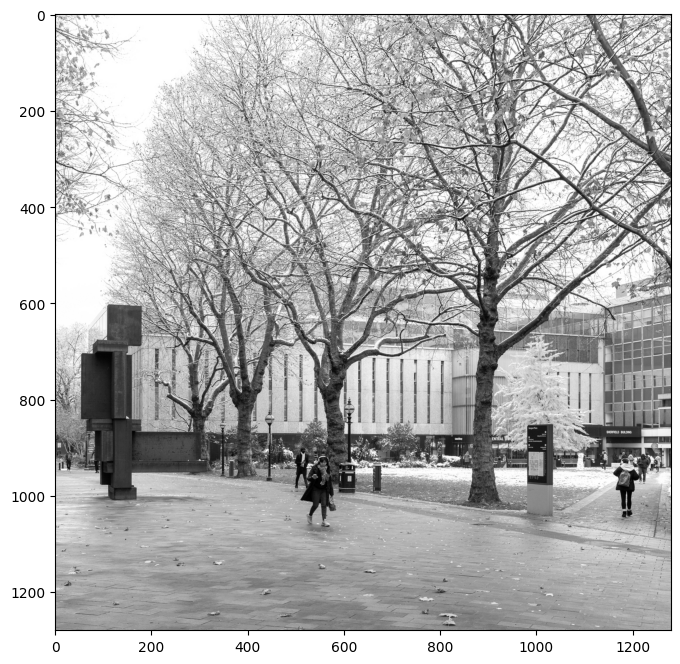

In [2]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

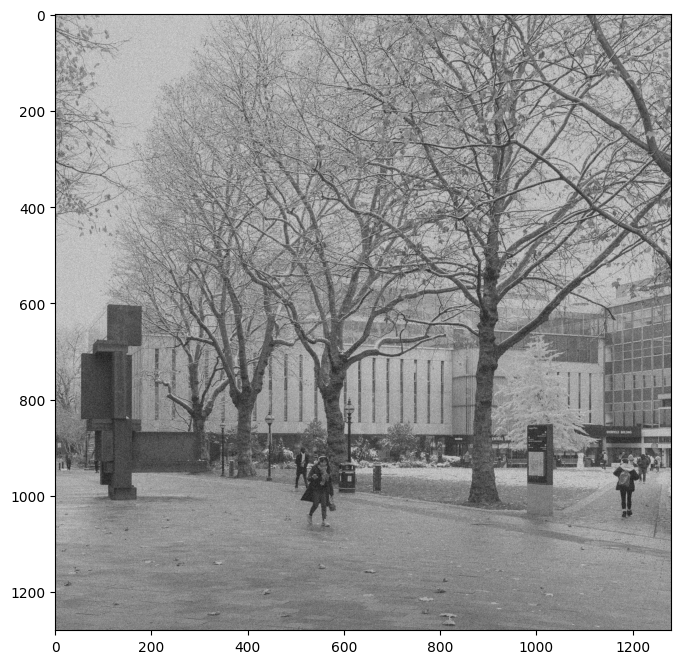

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


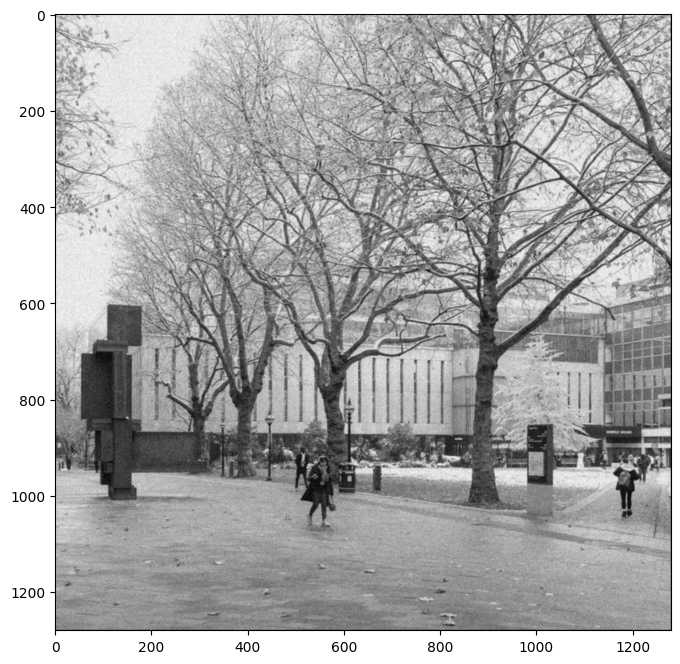

In [4]:
# Design the filter h
### Insert your code ###
h = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

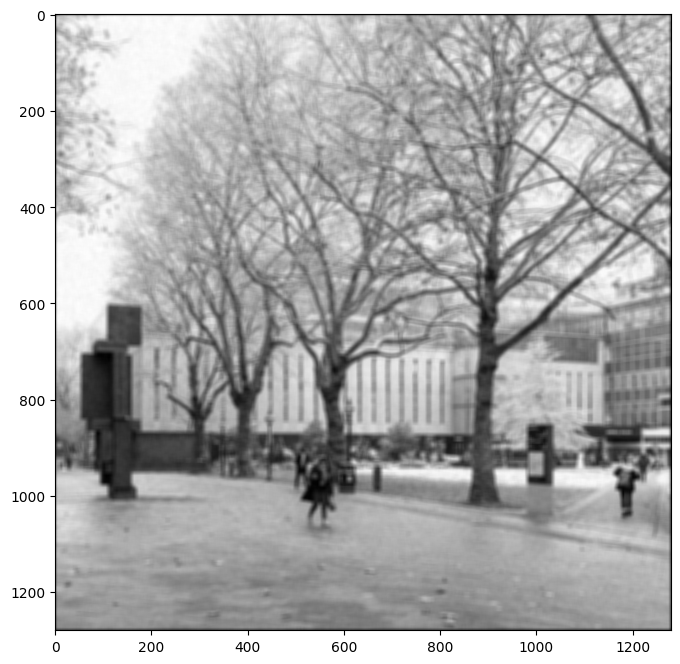

In [5]:
# Design the filter h
### Insert your code ###
value = 1 / (11 * 11)

h = np.full((11,11),value)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

A larger kernel is more effective at removing noise because it averages over a larger number of pixels, incorporating more information to more accurately estimate the true value of each pixel. By averaging a broader dataset, the influence of outliers (such as noisy pixels) is reduced, leading to a cleaner result.

However, a larger kernel also causes more blurring in the image. This occurs because the wider averaging causes pixel values to converge toward the mean of their neighbors, reducing fine details.

This process involves a trade-off between noise reduction and detail preservation. Larger kernels are better at removing noise but at the cost of losing more detail. A more effective alternative could be a median filter with a smaller kernel size, which efficiently removes noise without being as sensitive to outliers and helps retain more detail.

Additionally, larger kernels are computationally more expensive, as they require averaging over more pixels, thus increasing the computational load. As the kernel size increases, a larger window is considered for averaging each pixel, which results in greater smoothing and a blurrier image.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
sobel_y:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


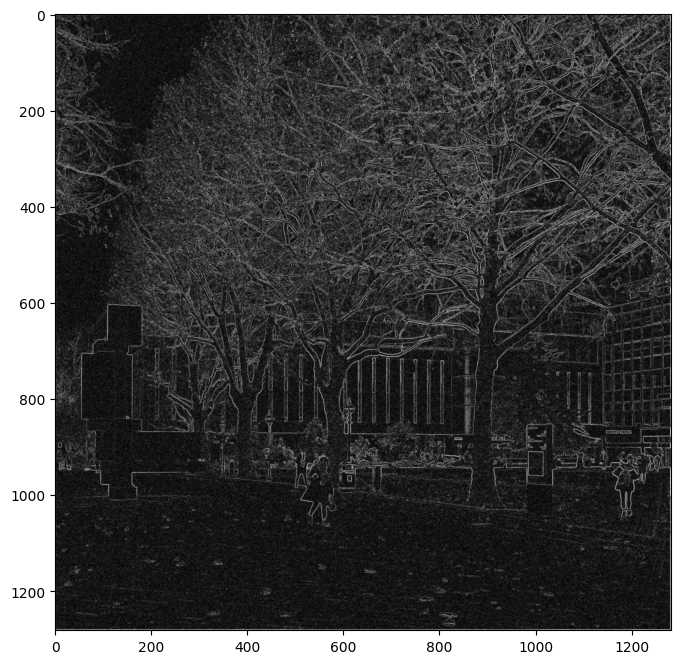

In [6]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Image filtering
### Insert your code ###
grad_x = scipy.signal.convolve2d(image_noisy, sobel_x)
grad_y = scipy.signal.convolve2d(image_noisy, sobel_y)

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

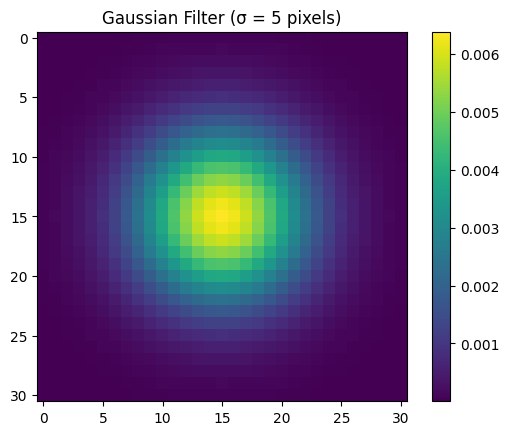

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    size = int(2 * np.ceil(3 * sigma) + 1)
    center = size // 2

    # Create a grid of (x, y) coordinates
    x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)

    # Compute the Gaussian function
    h = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize so that the sum of the kernel is 1
    h /= h.sum()
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)
plt.title(f'Gaussian Filter (σ = {sigma} pixels)')
plt.colorbar()
plt.show()

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Time taken to complete Gaussian Smoothing:  4.502561092376709  seconds


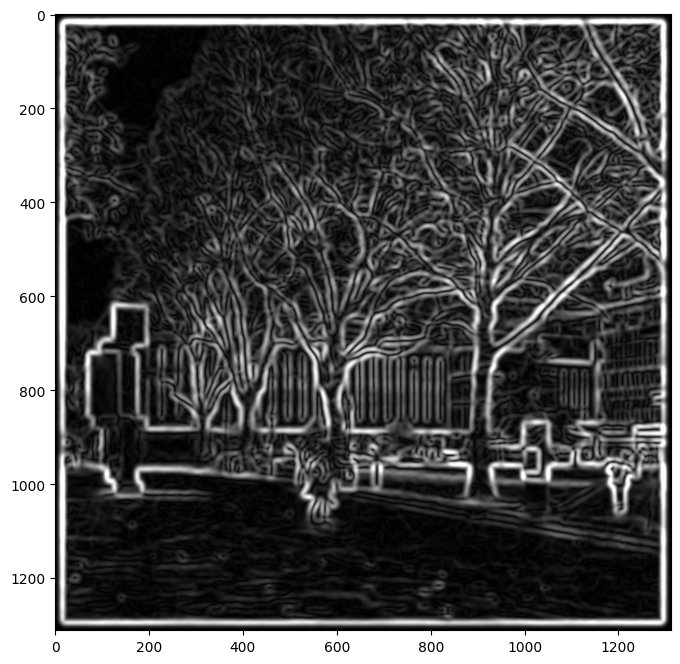

In [8]:
# Construct the Gaussian filter
### Insert your code ###
gaussian_kernel = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
### Insert your code ###
start_time = time.time()
smoothed_image = scipy.signal.convolve2d(image_noisy, gaussian_kernel)
end_time = time.time()

guassian_time = end_time - start_time

# Image filtering
### Insert your code ###
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Calculate the gradient magnitude
### Insert your code ###
grad_x = scipy.signal.convolve2d(smoothed_image, sobel_x)
grad_y = scipy.signal.convolve2d(smoothed_image, sobel_y)

grad_mag = np.sqrt(grad_x**2 + grad_y**2)

print("Time taken to complete Gaussian Smoothing: ", guassian_time," seconds")

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

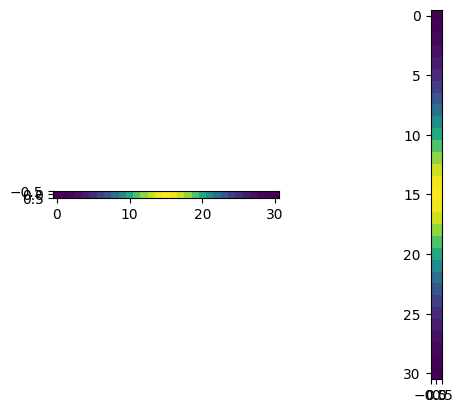

In [107]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    sz = int(2 * np.ceil(3 * sigma) + 1)  # Ensure the filter covers 3 sigma on either side
    x = np.arange(-sz // 2 + 1, sz // 2 + 1)  # Symmetric range around 0
    
    # Compute the Gaussian function
    h = np.exp(-x**2 / (2 * sigma**2))
    
    # Normalize the kernel so the sum is 1
    h /= np.sum(h)
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma).reshape(1, -1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma).reshape(-1, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.5 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Separable Gaussian smoothing time: 0.4808 seconds
Time difference compared to non-separable filtering: 4.0218 seconds
Difference between separable and non-separable convolution outputs: 9.533539748141301e-09


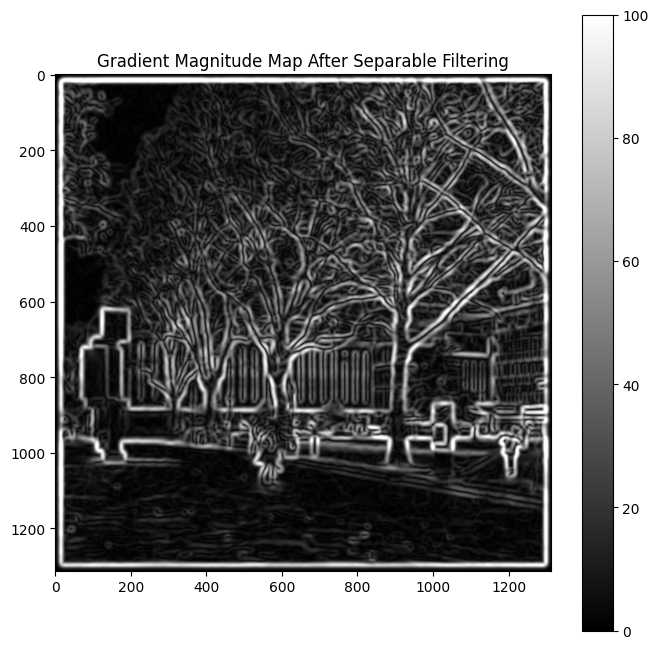

In [14]:
# Perform separable Gaussian smoothing and count time
start_time = time.time()
smoothed_image_x = scipy.signal.convolve2d(image_noisy, h_x.reshape(1, -1), mode='full')  # Horizontal filter
smoothed_image_full = scipy.signal.convolve2d(smoothed_image_x, h_y, mode='full')  # Vertical filter
end_time = time.time()

# Calculate time difference
gaussian_time2 = end_time - start_time
time_difference = abs(gaussian_time2 - guassian_time)  
print(f"Separable Gaussian smoothing time: {gaussian_time2:.4f} seconds")
print(f"Time difference compared to non-separable filtering: {time_difference:.4f} seconds")

# Apply Sobel filters to compute gradients
dx = scipy.signal.convolve2d(smoothed_image_full, sobel_x, mode='full')  # Sobel filter along x-axis
dy = scipy.signal.convolve2d(smoothed_image_full, sobel_y, mode='full')  # Sobel filter along y-axis

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(dx**2 + dy**2)

print(f"Difference between separable and non-separable convolution outputs: {abs(np.sum(grad_mag2-grad_mag))}")

# Display the gradient magnitude map
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)
plt.title("Gradient Magnitude Map After Separable Filtering")
plt.colorbar()
plt.show()

### 2.6 Comment on the Gaussian + Sobel filtering results and the computational time.

Conclusions:

Mean difference between gradient magnitude maps generated by separable Gaussian + Sobel and non-separable Gaussian: 9.533539748141301e-09.
It took 4.0218 seconds to calculate the non-separable Gaussian + Sobel.
It took 0.4808 seconds to compute the separable Gaussian + Sobel.

Most likely due to floating-point mistakes, the stated mean difference between the two approaches is quite modest. Given that the Gaussian filter is theoretically separable, this suggests that the two approaches yield essentially the same results.

Comparing the separable and non-separable Gaussian filters, the former is more than nine times faster. Given that two 1D convolutions have a total computational complexity of O(N) and a 2D convolution's is O(N^2), the separable technique is substantially more efficient. The non-separable filter only executes one 2D convolution, but the separable filter applies two 1D convolutions, resulting in this performance discrepancy.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [16]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [103]:
# Expand the dimension of the numpy array
### Insert your code ###
expanded_image = image_noisy[np.newaxis, np.newaxis, :, :]

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
input_tensor = torch.from_numpy(expanded_image).float()
print(input_tensor.shape)

torch.Size([1, 1, 1280, 1280])


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

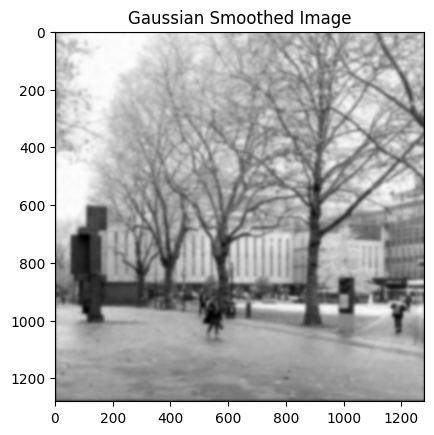

In [105]:
# Define Gaussian parameters
sigma = 5.0
size = int(2 * np.ceil(3 * sigma) + 1)
center = size // 2

# Create the 2D Gaussian kernel directly
x, y = np.meshgrid(np.arange(size) - center, np.arange(size) - center)
gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
gaussian_kernel /= gaussian_kernel.sum()  # Normalize the kernel

# Convert the kernel to a PyTorch tensor and reshape for Conv2D
gaussian_kernel_tensor = torch.tensor(gaussian_kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Perform convolution using F.conv2d
smoothed_image = torch.nn.functional.conv2d(input_tensor, gaussian_kernel_tensor, padding=center)

# Visualize the smoothed image
plt.imshow(smoothed_image[0, 0].detach().numpy(), cmap='gray')
plt.title("Gaussian Smoothed Image")
plt.show()

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

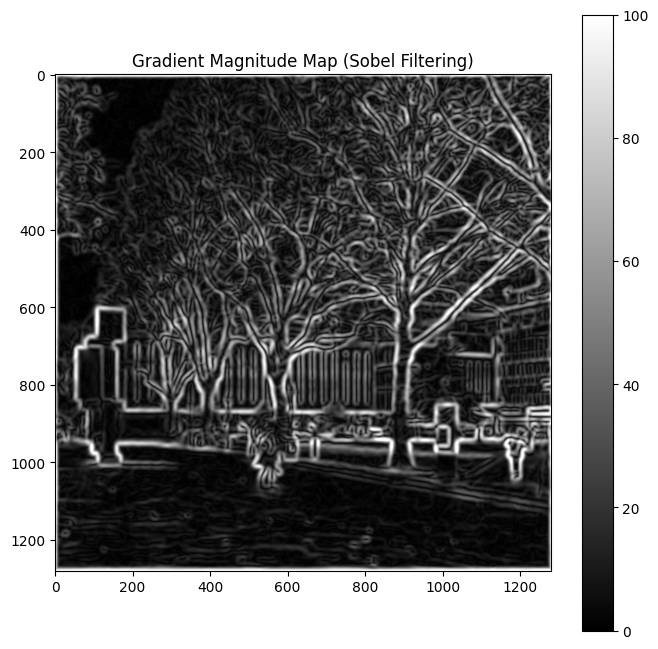

In [96]:
# Define Sobel kernels (for edge detection in X and Y directions)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# Create Conv2D filters for Sobel in X and Y directions
sobel_x_layer = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)
sobel_y_layer = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)

# Assign Sobel kernels to the Conv2D layers
sobel_x_layer.weight.data = torch.from_numpy(sobel_x).float().unsqueeze(0).unsqueeze(0)
sobel_y_layer.weight.data = torch.from_numpy(sobel_y).float().unsqueeze(0).unsqueeze(0)

# Perform Sobel filtering on the Gaussian-smoothed image
image_filtered_float = smoothed_image.float()  # Convert to float
g_x = sobel_x_layer(image_filtered_float)  # Apply Sobel X filter (horizontal edges)
g_y = sobel_y_layer(image_filtered_float)  # Apply Sobel Y filter (vertical edges)

# Calculate the gradient magnitude map
gradient_magnitude = torch.sqrt(g_x**2 + g_y**2)

# Convert to numpy and visualize
grad_mag3 = gradient_magnitude.squeeze().detach().numpy()  # Remove extra dimensions for visualization

# Display the gradient magnitude map
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)
plt.title("Gradient Magnitude Map (Sobel Filtering)")
plt.colorbar()
plt.show()